In [52]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

In [53]:
import torch
import torchvision
import torchvision.models.segmentation as models

In [54]:
import pandas as pd
import plotly.express as px


In [55]:
file_path = 'f3_csv.csv'

In [56]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(file_path)

df.rename(columns={df.columns[0]: 'treino_f3'}, inplace=True)

df['treino_f3'] = df['treino_f3'].astype(float)

fig = px.line(df, x='treino_f3', y=df.columns[1:], markers=True)

fig.update_layout(
    title='Desempenho de Diferentes Modelos no F3',
    # title={
    #     'text': 'Desempenho de Diferentes Modelos no F3',
    #     'y':0.94,
    #     'x':0.5,
    #     'xanchor': 'center',
    #     'yanchor': 'top'
    # },
    xaxis_title='Quantidade dos dados',
    yaxis_title='Desempenho (IoU)',
    legend_title='Dados do Pré-treino',
    xaxis_type='log',  # Definir o eixo x como logarítmico
    xaxis=dict(
        tickmode='array',
        tickvals=df['treino_f3'],  # Usar os valores da coluna como ticks
        ticktext=[str(v) for v in df['treino_f3']]  # Texto dos ticks como strings dos valores
    ),
    legend=dict(
        x=0.7,  # Posição x da legenda (0 = esquerda, 1 = direita)
        y=0,  # Posição y da legenda (0 = baixo, 1 = cima)
        traceorder='normal',
        bgcolor='rgba(255, 255, 255, 1)',  # Fundo da legenda com transparência
        bordercolor='Black',
        borderwidth=1
    )
)
fig.write_image("grafico_modelos_f3.png")
fig.show()

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
f3 = [0.522, 0.627, 0.714, 0.702]
seam_ai = [0.413, 0.635, 0.717, 0.714]
both = [0.388, 0.606, 0.686, 0.721]
sup = [0.352, 0.634, 0.684, 0.689]
imagenet = [0.333, 0.629, 0.703, 0.692]
coco = [0.377, 0.644, 0.714, 0.687]

# x = np.arange(len(f3))
x = [0.01, 0.1, 0.5, 1]

In [59]:
f3_min = [0.030, 0.016, 0.006, 0.017]
seam_ai_min = [0.035, 0.076, 0.023, 0.008]
both_min = [0.012, 0.002, 0.001, 0.026]
sup_min = [0.010, 0.048, 0.033, 0.008]
imagenet_min = [0.031, 0.037, 0.003, 0.015]
coco_min = [0.027, 0.039, 0.022, 0.003]

In [60]:
f3_max = [0.001, 0.024, 0.025, 0.003]
seam_ai_max = [0.060, 0.070, 0.015, 0.019]
both_max = [0.061, 0.022, 0.006, 0.007]
sup_max = [0.003, 0.064, 0.026, 0.037]
imagenet_max = [0.054, 0.054, 0.009, 0.003]
coco_max = [0.020, 0.041, 0.006, 0.041]

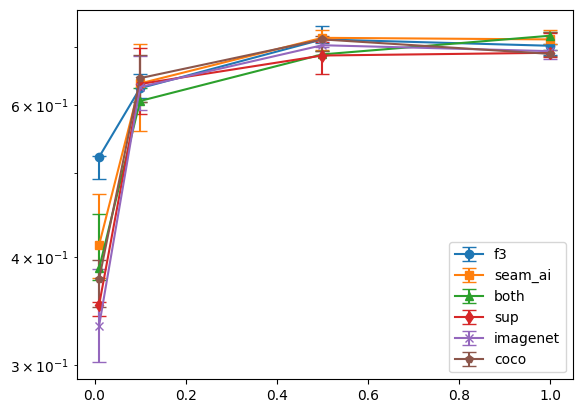

In [61]:
plt.errorbar(x, f3, yerr=[f3_min, f3_max], fmt='o-', capsize=5, label='f3')
plt.errorbar(x, seam_ai, yerr=[seam_ai_min, seam_ai_max], fmt='s-', capsize=5, label='seam_ai')

plt.errorbar(x, both, yerr=[both_min, both_max], fmt='^-', capsize=5, label='both')
plt.errorbar(x, sup, yerr=[sup_min, sup_max], fmt='d-', capsize=5, label='sup')

plt.errorbar(x, imagenet, yerr=[imagenet_min, imagenet_max], fmt='x-', capsize=5, label='imagenet')
plt.errorbar(x, coco, yerr=[coco_min, coco_max], fmt='p-', capsize=5, label='coco')


plt.yscale('log')
plt.legend()
plt.show()


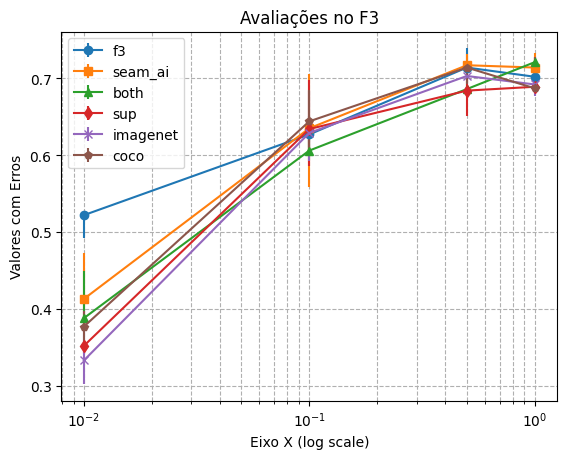

In [62]:
plt.errorbar(x, f3, yerr=[f3_min, f3_max], fmt='o-', label='f3')
plt.errorbar(x, seam_ai, yerr=[seam_ai_min, seam_ai_max], fmt='s-', label='seam_ai')
plt.errorbar(x, both, yerr=[both_min, both_max], fmt='^-', label='both')
plt.errorbar(x, sup, yerr=[sup_min, sup_max], fmt='d-', label='sup')
plt.errorbar(x, imagenet, yerr=[imagenet_min, imagenet_max], fmt='x-', label='imagenet')
plt.errorbar(x, coco, yerr=[coco_min, coco_max], fmt='p-', label='coco')

# Configurações do gráfico
plt.xscale('log')  # Definindo a escala logarítmica no eixo x
plt.xlabel('Eixo X (log scale)')
plt.ylabel('Valores com Erros')
plt.title('Avaliações no F3')
plt.legend()
plt.grid(True, which="both", ls="--")

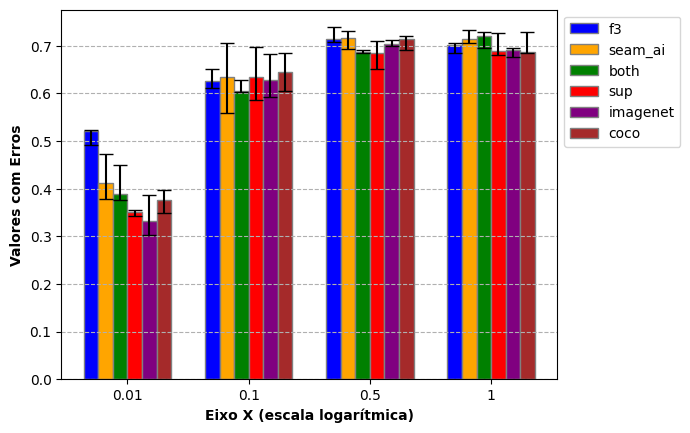

In [63]:
x = [0.01, 0.1, 0.5, 1]
labels = ['0.01', '0.1', '0.5', '1']

# Definindo a largura das barras
bar_width = 0.12

# Definindo as posições das barras no eixo x
r1 = np.arange(len(x))
r2 = [r + bar_width for r in r1]
r3 = [r + bar_width for r in r2]
r4 = [r + bar_width for r in r3]
r5 = [r + bar_width for r in r4]
r6 = [r + bar_width for r in r5]

# Criando o gráfico de barras
plt.bar(r1, f3, color='blue', width=bar_width, edgecolor='grey', label='f3', yerr=[f3_min, f3_max], capsize=5)
plt.bar(r2, seam_ai, color='orange', width=bar_width, edgecolor='grey', label='seam_ai', yerr=[seam_ai_min, seam_ai_max], capsize=5)
plt.bar(r3, both, color='green', width=bar_width, edgecolor='grey', label='both', yerr=[both_min, both_max], capsize=5)
plt.bar(r4, sup, color='red', width=bar_width, edgecolor='grey', label='sup', yerr=[sup_min, sup_max], capsize=5)
plt.bar(r5, imagenet, color='purple', width=bar_width, edgecolor='grey', label='imagenet', yerr=[imagenet_min, imagenet_max], capsize=5)
plt.bar(r6, coco, color='brown', width=bar_width, edgecolor='grey', label='coco', yerr=[coco_min, coco_max], capsize=5)

# Adicionando rótulos e título
plt.xlabel('Eixo X (escala logarítmica)', fontweight='bold')
plt.ylabel('Valores com Erros', fontweight='bold')
plt.xticks([r + 2.5*bar_width for r in range(len(x))], labels)

# Exibir legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adicionar grid
plt.grid(True, which="both", ls="--", axis='y')

# Exibindo o gráfico
plt.show()

In [64]:
file_path_2 = 'seam_ai_csv.csv'

In [65]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(file_path_2)

df.rename(columns={df.columns[0]: 'treino_parihaka'}, inplace=True)

df['treino_parihaka'] = df['treino_parihaka'].astype(float)

fig = px.line(df, x='treino_parihaka', y=df.columns[1:], markers=True)

fig.update_layout(
    title='Desempenho de Diferentes Modelos no Parihaka',
    # title={
    #     'text': 'Desempenho de Diferentes Modelos no F3',
    #     'y':0.94,
    #     'x':0.5,
    #     'xanchor': 'center',
    #     'yanchor': 'top'
    # },
    xaxis_title='Quantidade dos dados',
    yaxis_title='Desempenho (IoU)',
    legend_title='Dados do Pré-treino',
    xaxis_type='log',  # Definir o eixo x como logarítmico
    xaxis=dict(
        tickmode='array',
        tickvals=df['treino_parihaka'],  # Usar os valores da coluna como ticks
        ticktext=[str(v) for v in df['treino_parihaka']]  # Texto dos ticks como strings dos valores
    ),
    legend=dict(
        x=0.7,  # Posição x da legenda (0 = esquerda, 1 = direita)
        y=0,  # Posição y da legenda (0 = baixo, 1 = cima)
        traceorder='normal',
        bgcolor='rgba(255, 255, 255, 1)',  # Fundo da legenda com transparência
        bordercolor='Black',
        borderwidth=1
    )
)
fig.write_image("grafico_modelos_parihaka.png")
fig.show()

In [66]:
f3 = [0.573, 0.677, 0.741, 0.722]
seam_ai = [0.582, 0.712, 0.737, 0.726]
both = [0.557, 0.703, 0.738, 0.739]
sup = [0.536, 0.684, 0.744, 0.735]
imagenet = [0.583, 0.724, 0.712, 0.738]
coco = [0.575, 0.687, 0.734, 0.716]

In [67]:
f3_min = [0.089, 0.037, 0.017, 0.005]
seam_ai_min = [0.008, 0.031, 0.006, 0.031]
both_min = [0.003, 0.003, 0.008, 0.016]
sup_min = [0.018, 0.000, 0.026, 0.005]
imagenet_min = [0.017, 0.109, 0.011, 0.038]
coco_min = [0.022, 0.028, 0.004, 0.015]

In [68]:
f3_max = [0.014, 0.005, 0.012, 0.022]
seam_ai_max = [0.080, 0.034, 0.010, 0.011]
both_max = [0.026, 0.073, 0.010, 0.009]
sup_max = [0.083, 0.044, 0.003, 0.000]
imagenet_max = [0.097, 0.019, 0.023, 0.012]
coco_max = [0.069, 0.007, 0.006, 0.021]

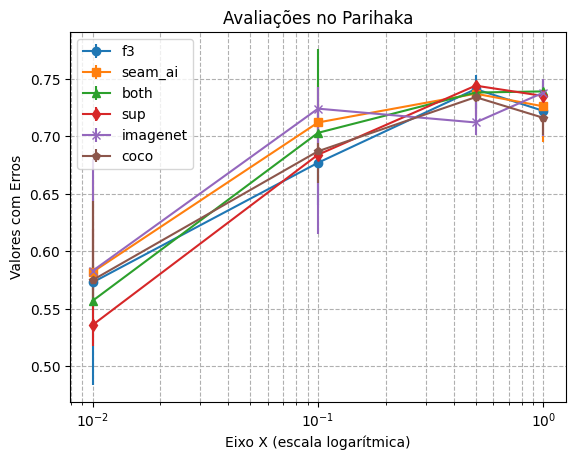

In [69]:
plt.errorbar(x, f3, yerr=[f3_min, f3_max], fmt='o-', label='f3')
plt.errorbar(x, seam_ai, yerr=[seam_ai_min, seam_ai_max], fmt='s-', label='seam_ai')
plt.errorbar(x, both, yerr=[both_min, both_max], fmt='^-', label='both')
plt.errorbar(x, sup, yerr=[sup_min, sup_max], fmt='d-', label='sup')
plt.errorbar(x, imagenet, yerr=[imagenet_min, imagenet_max], fmt='x-', label='imagenet')
plt.errorbar(x, coco, yerr=[coco_min, coco_max], fmt='p-', label='coco')

plt.xscale('log')  # Definindo a escala logarítmica no eixo x
plt.xlabel('Eixo X (escala logarítmica)')
plt.ylabel('Valores com Erros')
plt.title('Avaliações no Parihaka')
plt.legend()
plt.grid(True, which="both", ls="--")

# Exibindo o gráfico
plt.show()

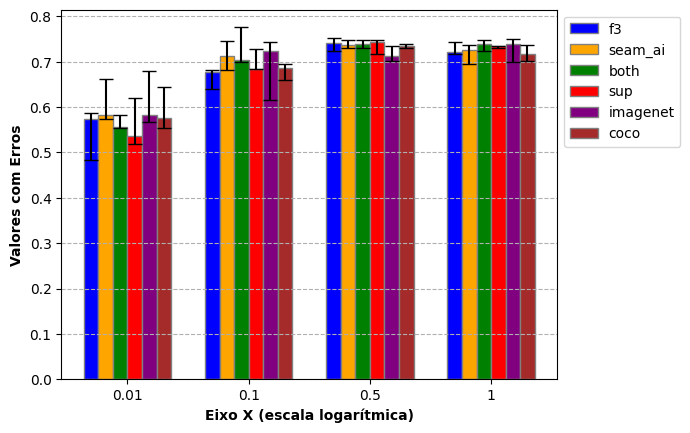

In [70]:
x = [0.01, 0.1, 0.5, 1]
labels = ['0.01', '0.1', '0.5', '1']

# Definindo a largura das barras
bar_width = 0.12

# Definindo as posições das barras no eixo x
r1 = np.arange(len(x))
r2 = [r + bar_width for r in r1]
r3 = [r + bar_width for r in r2]
r4 = [r + bar_width for r in r3]
r5 = [r + bar_width for r in r4]
r6 = [r + bar_width for r in r5]

# Criando o gráfico de barras
plt.bar(r1, f3, color='blue', width=bar_width, edgecolor='grey', label='f3', yerr=[f3_min, f3_max], capsize=5)
plt.bar(r2, seam_ai, color='orange', width=bar_width, edgecolor='grey', label='seam_ai', yerr=[seam_ai_min, seam_ai_max], capsize=5)
plt.bar(r3, both, color='green', width=bar_width, edgecolor='grey', label='both', yerr=[both_min, both_max], capsize=5)
plt.bar(r4, sup, color='red', width=bar_width, edgecolor='grey', label='sup', yerr=[sup_min, sup_max], capsize=5)
plt.bar(r5, imagenet, color='purple', width=bar_width, edgecolor='grey', label='imagenet', yerr=[imagenet_min, imagenet_max], capsize=5)
plt.bar(r6, coco, color='brown', width=bar_width, edgecolor='grey', label='coco', yerr=[coco_min, coco_max], capsize=5)

# Adicionando rótulos e título
plt.xlabel('Eixo X (escala logarítmica)', fontweight='bold')
plt.ylabel('Valores com Erros', fontweight='bold')
plt.xticks([r + 2.5*bar_width for r in range(len(x))], labels)

# Exibir legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Adicionar grid
plt.grid(True, which="both", ls="--", axis='y')

# Exibindo o gráfico
plt.show()

In [71]:
il_32_f3_data_path = 'data/f3/images/test/il_32.tif'
il_32_f3_mask_path = 'data/f3/annotations/test/il_32.png'

In [72]:
import tifffile as tiff
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [73]:
import models.deeplabv3 as dlv3
import models.deeplabv3_2 as dlv3_2
from data_modules.seismic import F3SeismicDataModule, ParihakaSeismicDataModule
from models.upconv_classifier import SegmentationModel, PredictionHead
import torchvision.models.segmentation as models

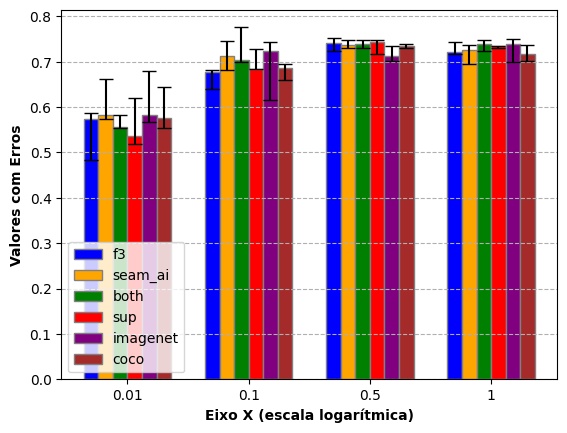

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
f3 = [0.573, 0.677, 0.741, 0.722]
seam_ai = [0.582, 0.712, 0.737, 0.726]
both = [0.557, 0.703, 0.738, 0.739]
sup = [0.536, 0.684, 0.744, 0.735]
imagenet = [0.583, 0.724, 0.712, 0.738]
coco = [0.575, 0.687, 0.734, 0.716]

f3_min = [0.089, 0.037, 0.017, 0.005]
seam_ai_min = [0.008, 0.031, 0.006, 0.031]
both_min = [0.003, 0.003, 0.008, 0.016]
sup_min = [0.018, 0.000, 0.026, 0.005]
imagenet_min = [0.017, 0.109, 0.011, 0.038]
coco_min = [0.022, 0.028, 0.004, 0.015]

f3_max = [0.014, 0.005, 0.012, 0.022]
seam_ai_max = [0.080, 0.034, 0.010, 0.011]
both_max = [0.026, 0.073, 0.010, 0.009]
sup_max = [0.083, 0.044, 0.003, 0.000]
imagenet_max = [0.097, 0.019, 0.023, 0.012]
coco_max = [0.069, 0.007, 0.006, 0.021]

# Definindo o eixo x
x = [0.01, 0.1, 0.5, 1]
labels = ['0.01', '0.1', '0.5', '1']

# Definindo a largura das barras
bar_width = 0.12

# Definindo as posições das barras no eixo x
r1 = np.arange(len(x))
r2 = [r + bar_width for r in r1]
r3 = [r + bar_width for r in r2]
r4 = [r + bar_width for r in r3]
r5 = [r + bar_width for r in r4]
r6 = [r + bar_width for r in r5]

# Criando o gráfico de barras
plt.bar(r1, f3, color='blue', width=bar_width, edgecolor='grey', label='f3', yerr=[f3_min, f3_max], capsize=5)
plt.bar(r2, seam_ai, color='orange', width=bar_width, edgecolor='grey', label='seam_ai', yerr=[seam_ai_min, seam_ai_max], capsize=5)
plt.bar(r3, both, color='green', width=bar_width, edgecolor='grey', label='both', yerr=[both_min, both_max], capsize=5)
plt.bar(r4, sup, color='red', width=bar_width, edgecolor='grey', label='sup', yerr=[sup_min, sup_max], capsize=5)
plt.bar(r5, imagenet, color='purple', width=bar_width, edgecolor='grey', label='imagenet', yerr=[imagenet_min, imagenet_max], capsize=5)
plt.bar(r6, coco, color='brown', width=bar_width, edgecolor='grey', label='coco', yerr=[coco_min, coco_max], capsize=5)

# Adicionando rótulos e título
plt.xlabel('Eixo X (escala logarítmica)', fontweight='bold')
plt.ylabel('Valores com Erros', fontweight='bold')
plt.xticks([r + 2.5*bar_width for r in range(len(x))], labels)

# Exibir legenda
plt.legend()

# Adicionar grid
plt.grid(True, which="both", ls="--", axis='y')

# Exibindo o gráfico
plt.show()
